Cars is an inbuild sample data 

In [2]:
summary(cars)

     speed           dist       
 Min.   : 4.0   Min.   :  2.00  
 1st Qu.:12.0   1st Qu.: 26.00  
 Median :15.0   Median : 36.00  
 Mean   :15.4   Mean   : 42.98  
 3rd Qu.:19.0   3rd Qu.: 56.00  
 Max.   :25.0   Max.   :120.00  

In [1]:
head(cars)

speed,dist
4,2
4,10
7,4
7,22
8,16
9,10


Graphical analysis:  
*Scatter plot:* Visualise the linear relationship between the predictor and response  
*Box plot:* To spot any outlier observations in the variable. Having outliers in your predictor can drastically affect the predictions as they can affect the direction/slope of the line of best fit.  
*Density plot:* To see the distribution of the predictor variable. Ideally, a close to normal distribution (a bell shaped curve), without being skewed to the left or right is preferred

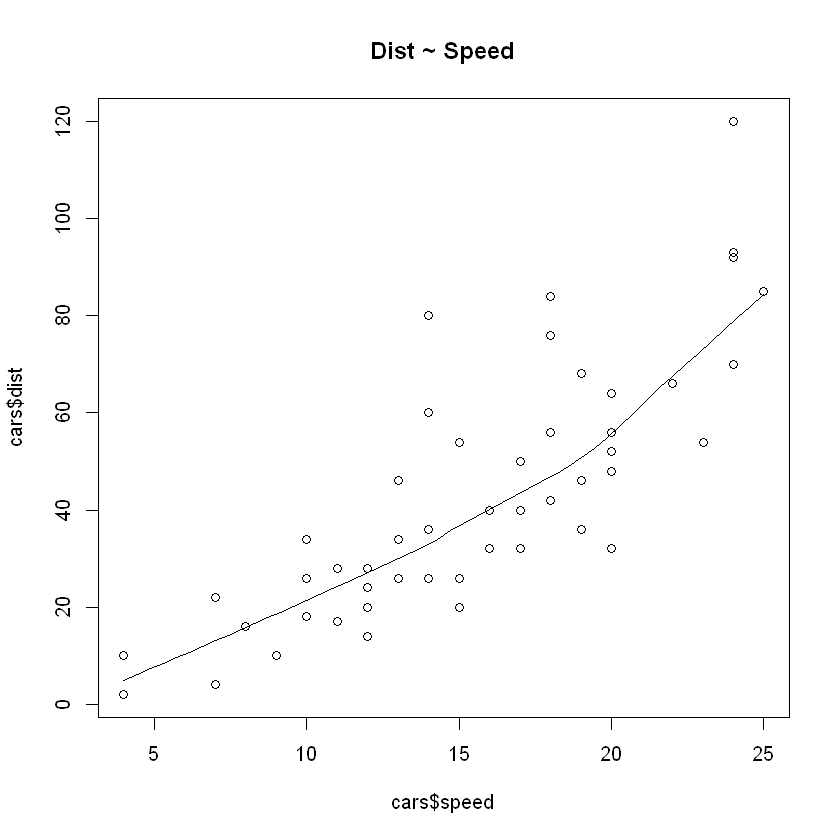

In [3]:
scatter.smooth(x=cars$speed, y=cars$dist, main="Dist ~ Speed")  # scatterplot

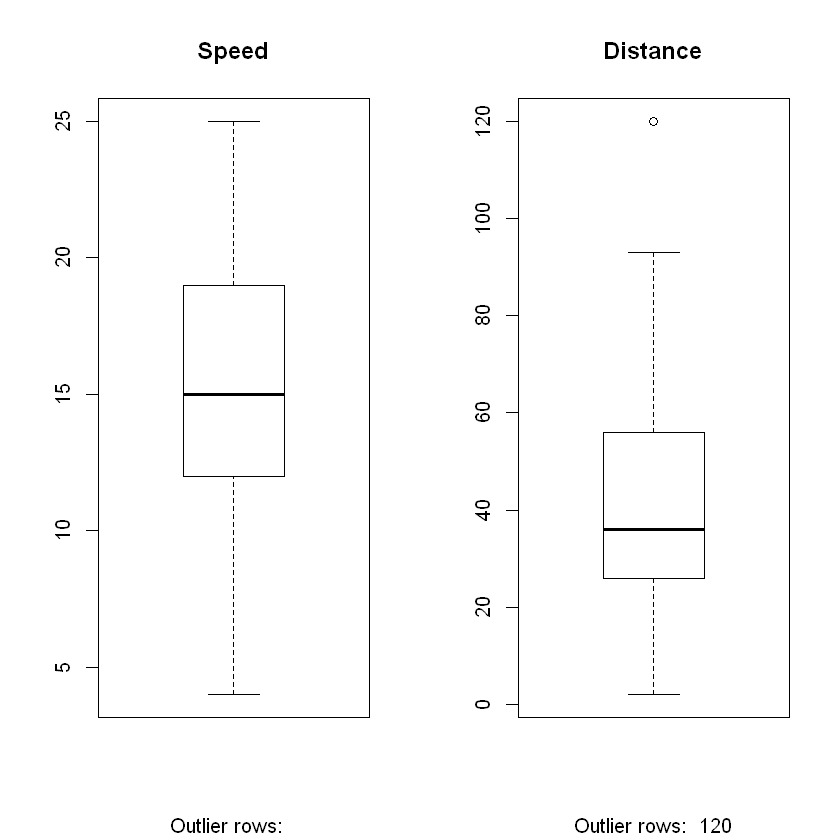

In [4]:
par(mfrow=c(1, 2))  # divide graph area in 2 columns

boxplot(cars$speed, main="Speed", sub=paste("Outlier rows: ", boxplot.stats(cars$speed)$out))  # box plot for 'speed'

boxplot(cars$dist, main="Distance", sub=paste("Outlier rows: ", boxplot.stats(cars$dist)$out))  # box plot for 'distance'

combine multiple plots into one overall graph, using either the par( ) or layout( ) function  
With the par( ) function,  
you can include the option mfrow=c(nrows, ncols)to create a matrix of nrows x ncols plots that are filled in by row.  
mfcol=c(nrows, ncols) fills in the matrix by columns.  

mf: matrix format..?

In [6]:
install.packages('e1071', dependencies=TRUE)

also installing the dependencies 'mlbench', 'SparseM'



package 'mlbench' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\IBM_ADMIN\AppData\Local\Temp\RtmpK8n8eL\downloaded_packages


In [5]:
library(e1071)  # for skewness function
par(mfrow=c(1, 2))  # divide graph area in 2 columns

plot(density(cars$speed), main="Density Plot: Speed", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(cars$speed), 2)))  # density plot for 'speed'

polygon(density(cars$speed), col="red")

plot(density(cars$dist), main="Density Plot: Distance", ylab="Frequency", sub=paste("Skewness:", round(e1071::skewness(cars$dist), 2)))  # density plot for 'dist'

polygon(density(cars$dist), col="red")

ERROR: Error in library(e1071): there is no package called 'e1071'


Correlation: Correlation is a statistical measure that shows the degree of linear dependence between two variables  
Classic : Correlation doesnt imply causation  
rely on logic and reasoning business or otherwise to arrive at the causaiton part

In [9]:
cor(cars$speed, cars$dist)  # calculate correlation between speed and distance 
#> [1] 0.8068949

[1] 0.8068949

building a linear model

In [11]:
linearMod <- lm(dist ~ speed, data=cars)  # build linear regression model on full data
print(linearMod)


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  



m = intercept.. go figure

In [12]:
summary(linearMod)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


Interpretation:  
-- Std.Error: against a indep variable is a measure of the rel between casual variable and the independent variable  
-- t value.. the corresponding casual variable's t value :: how extreme is the value of the casual variable given this standard error and assuming normal distribution  
-- Pr. is the p-value for the hypothesis test for which the t value is the test statistic. It tells you the probability of a test statistic at least as unusual as the one you obtained, if the null hypothesis were true. In this case, the null hypothesis is that the true coefficient is zero  
-- Residual standard error, represents the standard deviation of the residuals. It's a measure of how close the fit is to the points  
-- Multiple R-squared, also called the coefficient of determination is the proportion of the variance in the data that's explained by the model (the more variables you add the larger is the value of R)  
-- Adjusted one reduces that to account for the number of variables in the model.  
-- F statistic on the last line is telling you whether the regression as a whole is performing 'better than random' - any set of random predictors will have some relationship with the response, so it's seeing whether your model fits better than you'd expect if all your predictors had no relationship with the response (beyond what would be explained by that randomness)

#### More comments  
--  the P values both for the coeffs and for the model as a whole.. F stat.. indicate that the model is statistically significant.. i.e. it is too rare to have got these values by chance
The more the stars \*\* \*\*\* the more significant the the calculated statistic is  
-- where P values come into the picture there surely isa null hypothesis... here the null hypothess is that the coeffs are close to 0  
-- similarly t values  :: A larger t-value indicates that it is less likely that the coefficient is not equal to zero purely by chance. So, higher the t-value, the better  
--So if the Pr(>|t|) is low, the coefficients are significant (significantly different from zero). If the Pr(>|t|) is high, the coefficients are not significant
    

When p Value is less than significance level (< 0.05), you can safely reject the null hypothesis that the co-efficient beta of the predictor is zero

### Calculation of t statistic and p values

When the model co-efficients and standard error are known, the formula for calculating t Statistic and p-Value is as follows

t- statistic = (coefficient/Std.Error)

In [14]:
# capture model summary as an object
modelSummary <- summary(linearMod)

In [21]:
# model coefficients
modelCoeffs <- modelSummary$coefficients

In [22]:
modelCoeffs

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-17.579095,6.7584402,-2.601058,1.231882e-02
speed,3.932409,0.4155128,9.463990,1.489836e-12


In [16]:
# get beta estimate for speed
beta.estimate <- modelCoeffs["speed", "Estimate"]

In [17]:
# get std.error for speed  
std.error <- modelCoeffs["speed", "Std. Error"]

In [18]:
# calc t statistic
t_value <- beta.estimate/std.error 

In [23]:
# calc p Value
p_value <- 2*pt(-abs(t_value), df=nrow(cars)-ncol(cars)) 
# pt probability funciton
# dt desity funciotn
# qt q - quantile, inverse CDF

In [24]:
# fstatistic
f_statistic <- linearMod$fstatistic[1] 

In [26]:
# parameters for model p-value calc
f <- summary(linearMod)$fstatistic

In [27]:
model_p <- pf(f[1], f[2], f[3], lower=FALSE)


In [28]:
model_p

value 
1.489836e-12

pf does the cumulative distribution function (c. d. f.), the p standing for probability.  
qf does the the inverse c. d. f, the q standing for quantile.  
df does the probability density function (p. d. f.), the d standing for density.  
rf generates random variates having the F distribution, the r standing for random.  

tobs is the test statistic pf is cumulative prob distri  funciton

a lower-tailed test is the lower tail area given by  
pf(tobs, df1, df2)  
an upper-tailed test is the upper tail area given by  
1 - pf(tobs, df1, df2)  
a two-tailed test is twice whichever one-tailed P-value is smaller  
plow <- pf(tobs, df1, df2)  
2 * min(plow, 1 - plow)  

#### R squared and adj r squared

R-Squared tells us is the proportion of variation in the dependent (response) variable that has been explained by this model

R squared = 1 - (rss/tss)  
RSS residual sum of squares : (y - y hat)^2 : y hat is the fitted value form the model  
TSS total sum of square (y - y bar)^2: y bar is the mean of the y values  
a low R squared doesnt really lead to discarding the model..  

#### Other scores  
Given 2 models compare the 
AIC of the 2 models  
Mean absolute percentage error (MAPE),   
Mean Squared Error (MSE) and   
Mean Absolute Error (MAE)

R squred for a model with more variables will be more than the one with 1 lesser variable..   
You are anyway simply adding information  

#### Ajdusted R squred  

adjusted R-Squared is formulated such that it penalises the number of terms (read predictors) in your model

Rsquared adj = 1 - (MSE/MST)  
MSE : mean squared error = (RSS/(n-q))  
MST : mean squared total = (TSS /(n-1))  
n = number of observation , q = number of coeffs

Both Standard error and F test are good ness of fit measures:  
Std error =  (MSE)^(1/2) = (SSE)^(1/2) :: SSE == sum of squared errors  
F- Stat =  MSR/MSE :: MSR == mean squared regression  
MSR = (y bar - y har)^(1/2)

Akaike’s information criterion – AIC  
AIC = (−2) × ln(L) + (2×k)

k is the number of model parameters

Bayesian information criterion – BIC   
BIC = (−2) × ln(L) + k × ln(n)

In [31]:
AIC(linearMod)  


[1] 419.1569

In [32]:
BIC(linearMod)  

[1] 424.8929

STATISTIC :: CRITERION  
R-Squared :: Higher the better  
Adj R-Squared :: Higher the better  
F-Statistic :: Higher the better  
Std. Error :: Closer to zero the better  
t-statistic :: Should be greater 1.96 for p-value to be less than 0.05  
AIC :: Lower the better  
BIC :: Lower the better  
Mallows cp :: Should be close to the number of predictors in model  
MAPE (Mean absolute percentage error) :: Lower the better  
MSE (Mean squared error) :: Lower the better  
Min_Max Accuracy => mean(min(actual, predicted)/max(actual, predicted)) :: Higher the better  

### the LM created earlier used all of the data  
Which is less than ideal.. and hence the recommended 80:20 split

In [33]:
# Create Training and Test data -
set.seed(100)  # setting seed to reproduce results of random sampling
trainingRowIndex <- sample(1:nrow(cars), 0.8*nrow(cars))  # row indices for training data
trainingData <- cars[trainingRowIndex, ]  # model training data
testData  <- cars[-trainingRowIndex, ]   # test data

In [34]:
trainingRowIndex

[1] 16 13 27  3 22 46 36 50 23  7 25 35 11 15 28 24 41 12 33 45 17 21 43 29 38
[26]  5 19 48 49  6 10 18 34 30 32 14 47  9 44  2

In [35]:
-trainingRowIndex

[1] -16 -13 -27  -3 -22 -46 -36 -50 -23  -7 -25 -35 -11 -15 -28 -24 -41 -12 -33
[20] -45 -17 -21 -43 -29 -38  -5 -19 -48 -49  -6 -10 -18 -34 -30 -32 -14 -47  -9
[39] -44  -2

In [38]:
cars[16,]

,speed,dist
16,13,26


In [39]:
cars[-16,]

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10
7,10,18
8,10,26
9,10,34
10,11,17


Hmmm so the negation of the indices does work for creating the test set... 

In [40]:
# Build the model on training data
lmMod <- lm(dist ~ speed, data=trainingData)  # build the model
distPred <- predict(lmMod, testData)  # predict distance

In [41]:
summary (lmMod)


Call:
lm(formula = dist ~ speed, data = trainingData)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.350 -10.771  -2.137   9.255  42.231 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -22.657      7.999  -2.833  0.00735 ** 
speed          4.316      0.487   8.863 8.73e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.84 on 38 degrees of freedom
Multiple R-squared:  0.674,	Adjusted R-squared:  0.6654 
F-statistic: 78.56 on 1 and 38 DF,  p-value: 8.734e-11


The model's P value at the f statistic...  
And the p value for the coeffs are less than the significance level..   
And thus can be taken to be be statistically significant

The R squared and adj R squared are close enought ot the otriginal model that took all of the data in

In [42]:
summary(linearMod) # the prev model trained on all of the data


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


### Prediction accuracy and errors

In [43]:
actuals_preds <- data.frame(cbind(actuals=testData$dist, predicteds=distPred))  
# make actuals_predicteds dataframe.

In [46]:
correlation_accuracy <- cor(actuals_preds)

In [47]:
correlation_accuracy #0.8277535 that is to say that the predicted values closely track the actuals

,actuals,predicteds
actuals,1.0000000,0.8277535
predicteds,0.8277535,1.0000000


In [45]:
head(actuals_preds)

,actuals,predicteds
1,2,-5.392776
4,22,7.555787
8,26,20.504349
20,26,37.769100
26,54,42.085287
31,50,50.717663


In [48]:
# Min-Max Accuracy Calculation
min_max_accuracy <- mean(apply(actuals_preds, 1, min) / apply(actuals_preds, 1, max))

MinMaxAccuracy = mean(min(actuals,predicteds)/max(actuals,predicteds))   
chk formula above

In [49]:
# MAPE Calculation
mape <- mean(abs((actuals_preds$predicteds - actuals_preds$actuals))/actuals_preds$actuals)  

In [50]:
mape

[1] 0.6995032

In [51]:
install.packages('DMwR')

also installing the dependencies 'gtools', 'gdata', 'gplots', 'abind', 'ROCR'



package 'gtools' successfully unpacked and MD5 sums checked
package 'gdata' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked
package 'DMwR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\IBM_ADMIN\AppData\Local\Temp\RtmpK8n8eL\downloaded_packages


In [52]:
DMwR::regr.eval(actuals_preds$actuals, actuals_preds$predicteds)

mae         mse        rmse        mape 
 12.0082829 205.9652710  14.3514902   0.6995032

mean absolute error  
mean squared error  
root mean squared error  
Mean absolute percentage deviation  

In [54]:
install.packages('DAAG')

also installing the dependency 'latticeExtra'



package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'DAAG' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\IBM_ADMIN\AppData\Local\Temp\RtmpK8n8eL\downloaded_packages


[1] 251.2783

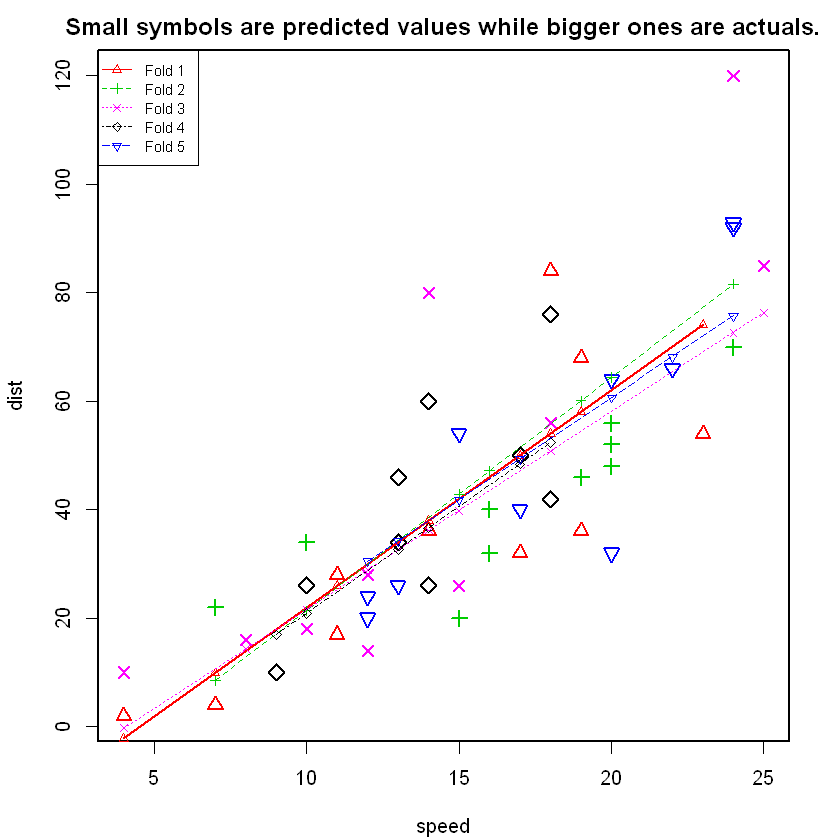

In [78]:
library(DAAG)
cvResults <- suppressWarnings(CVlm(#df=cars, #replaced df with data
                                    data=cars,
                                   form.lm=dist ~ speed,
                                   m=5, dots=FALSE, seed=29, 
                                   legend.pos="topleft", 
                                   printit=FALSE,
                                   main="Small symbols are predicted values while bigger ones are actuals.")); 
# performs the CV
attr(cvResults, 'ms')  

## and lo behold.....